# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00063_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00064_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00065_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00063_ocubes.fits 4593.5
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00064_ocubes.fits 4593.5
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/kb220129_00065_ocubes.fits 4593.5
212 1917
The beginning and ending wavelength cuts for the cube are 212.00 and 1917.00 respectively


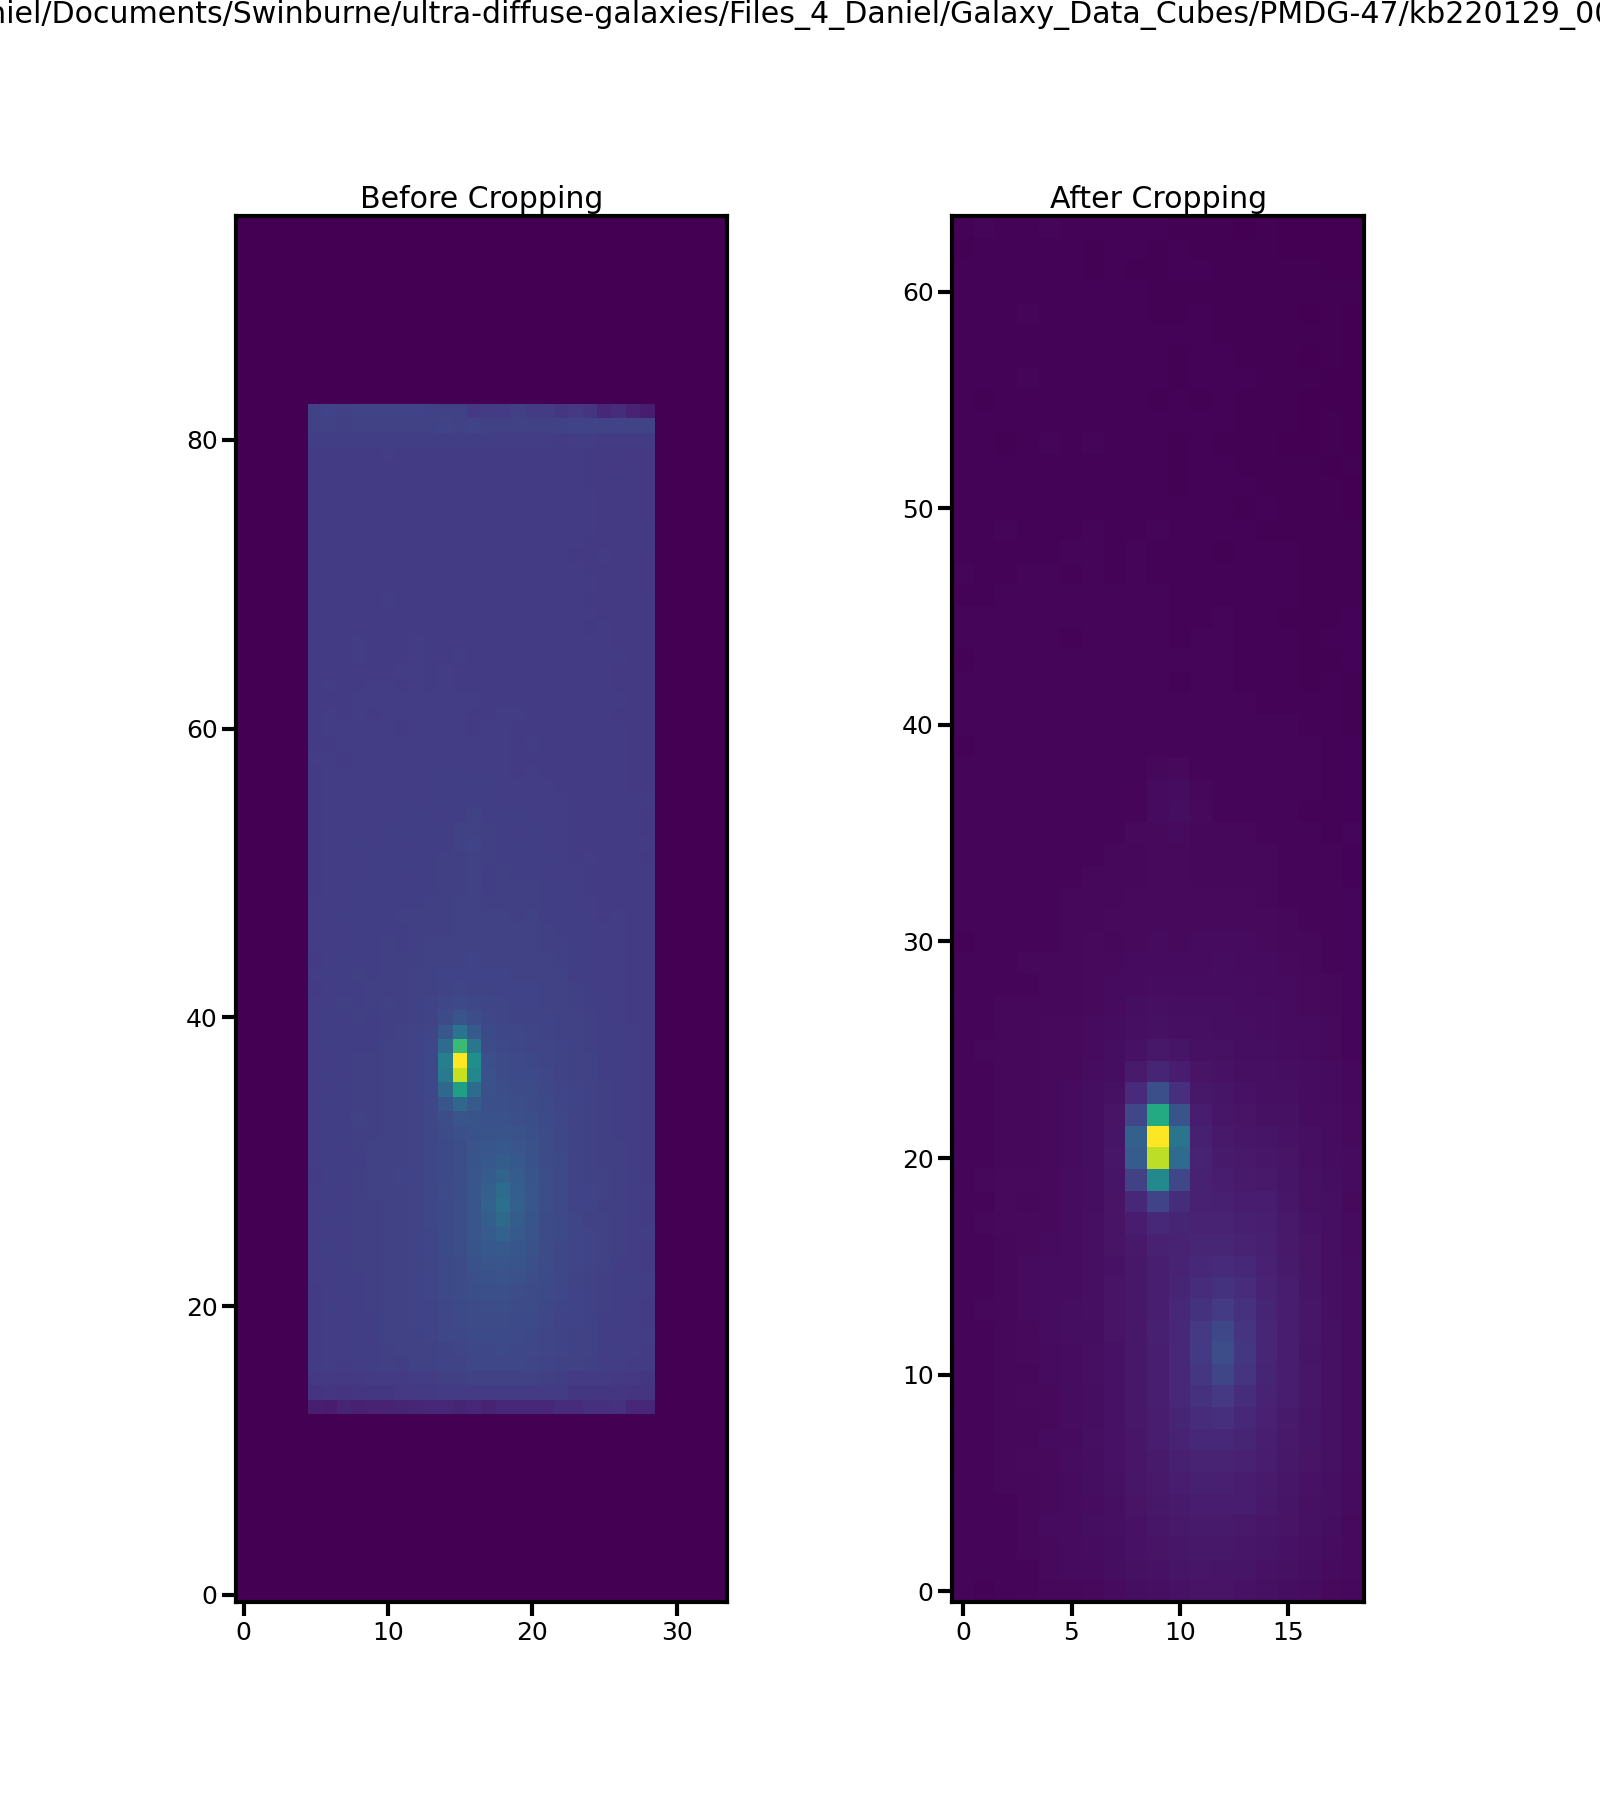

Files Written out


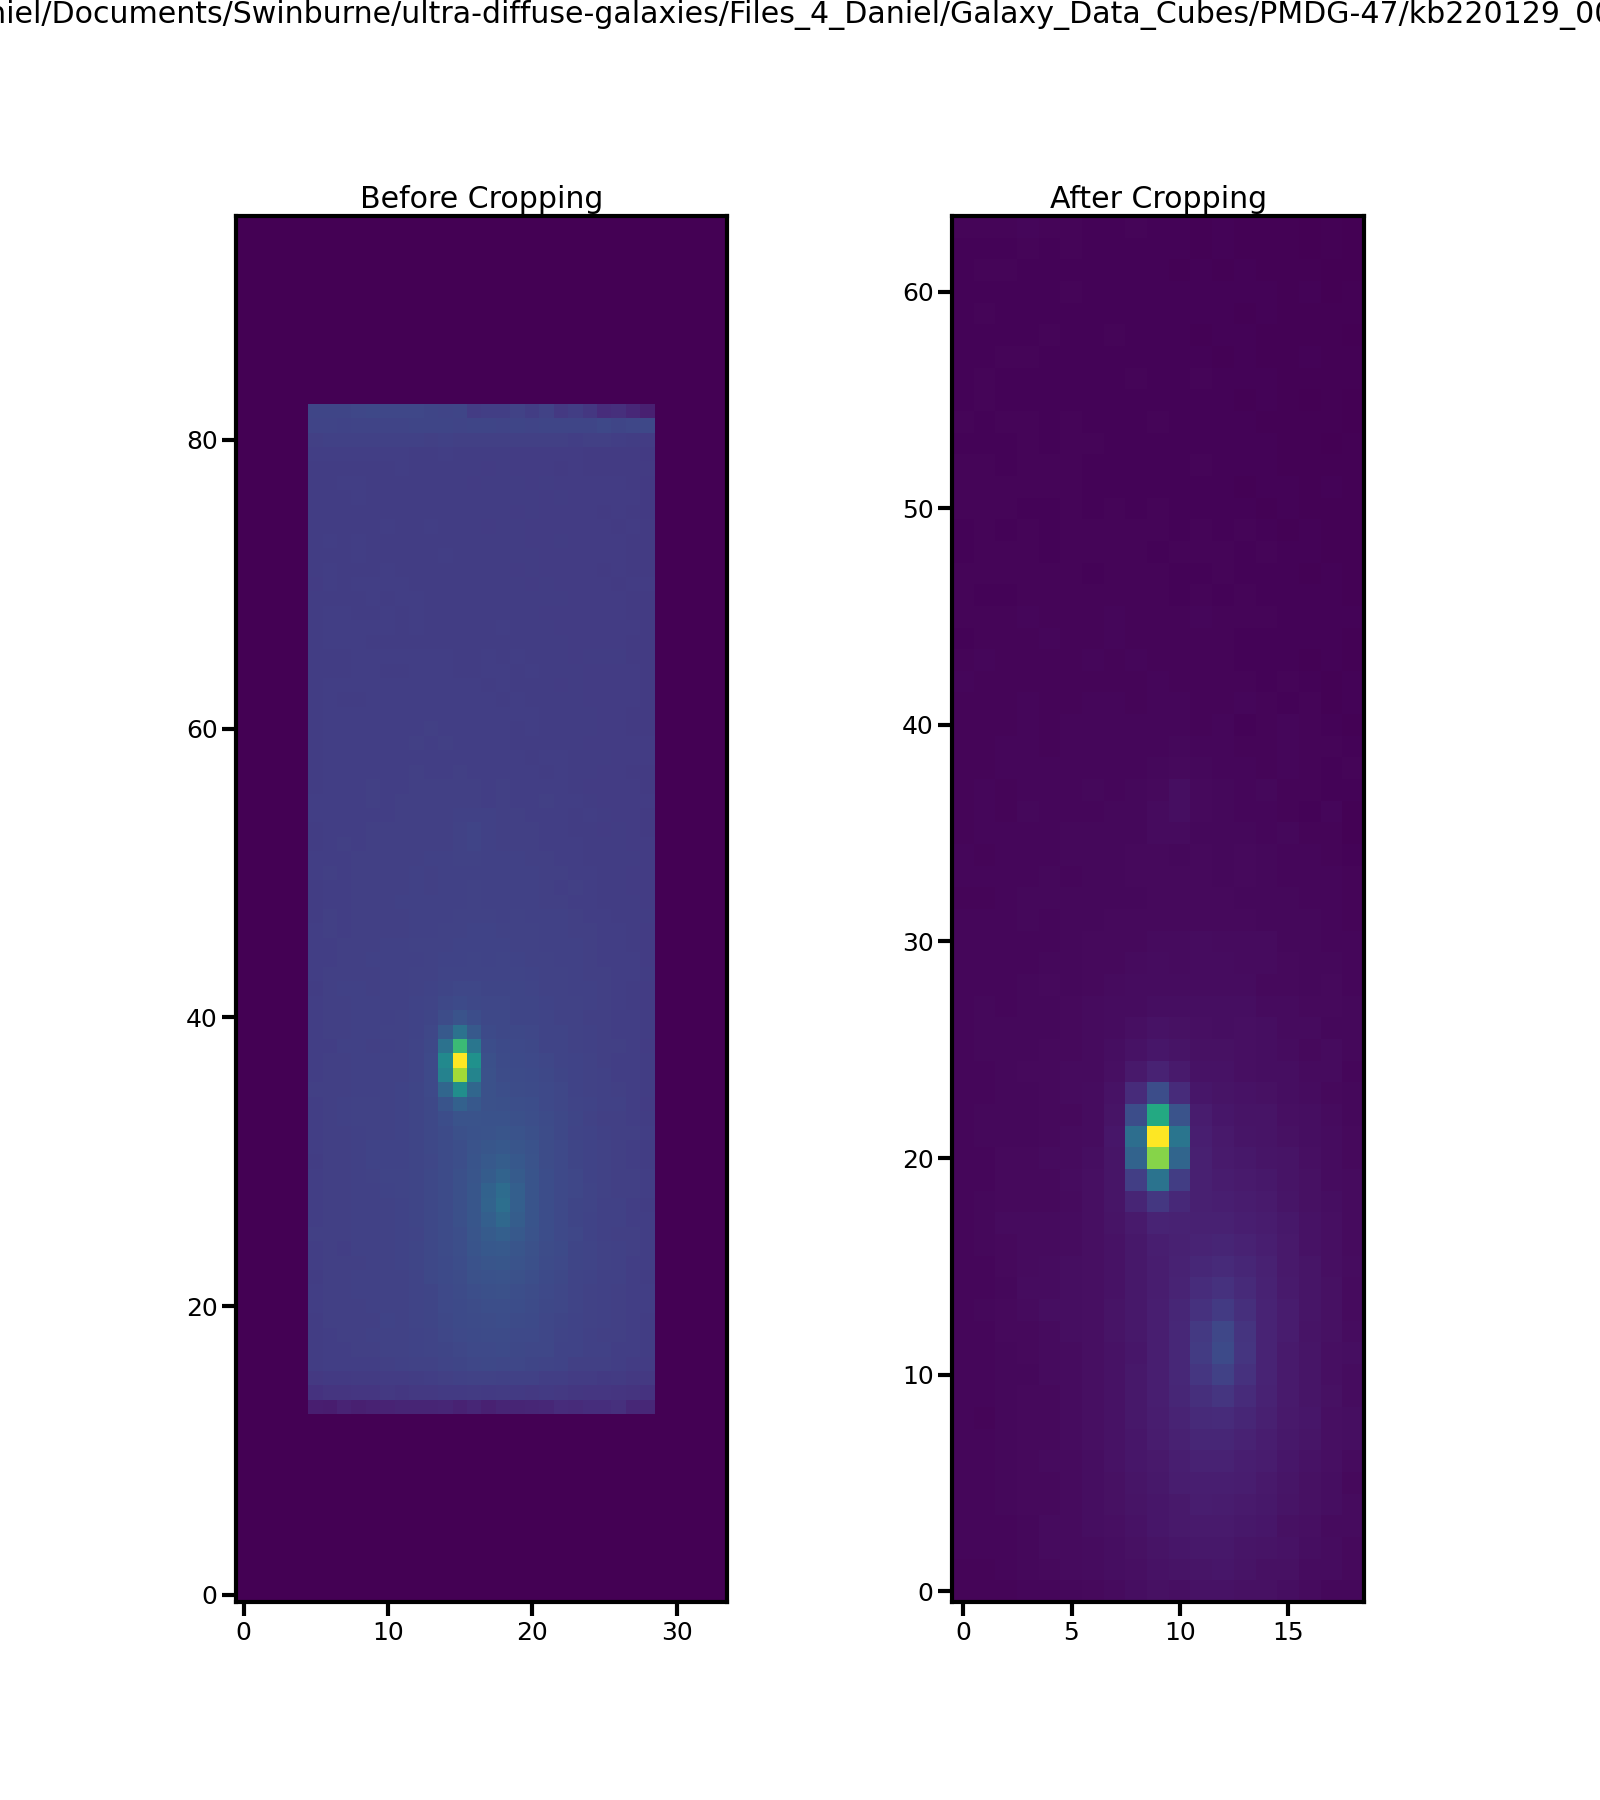

Files Written out


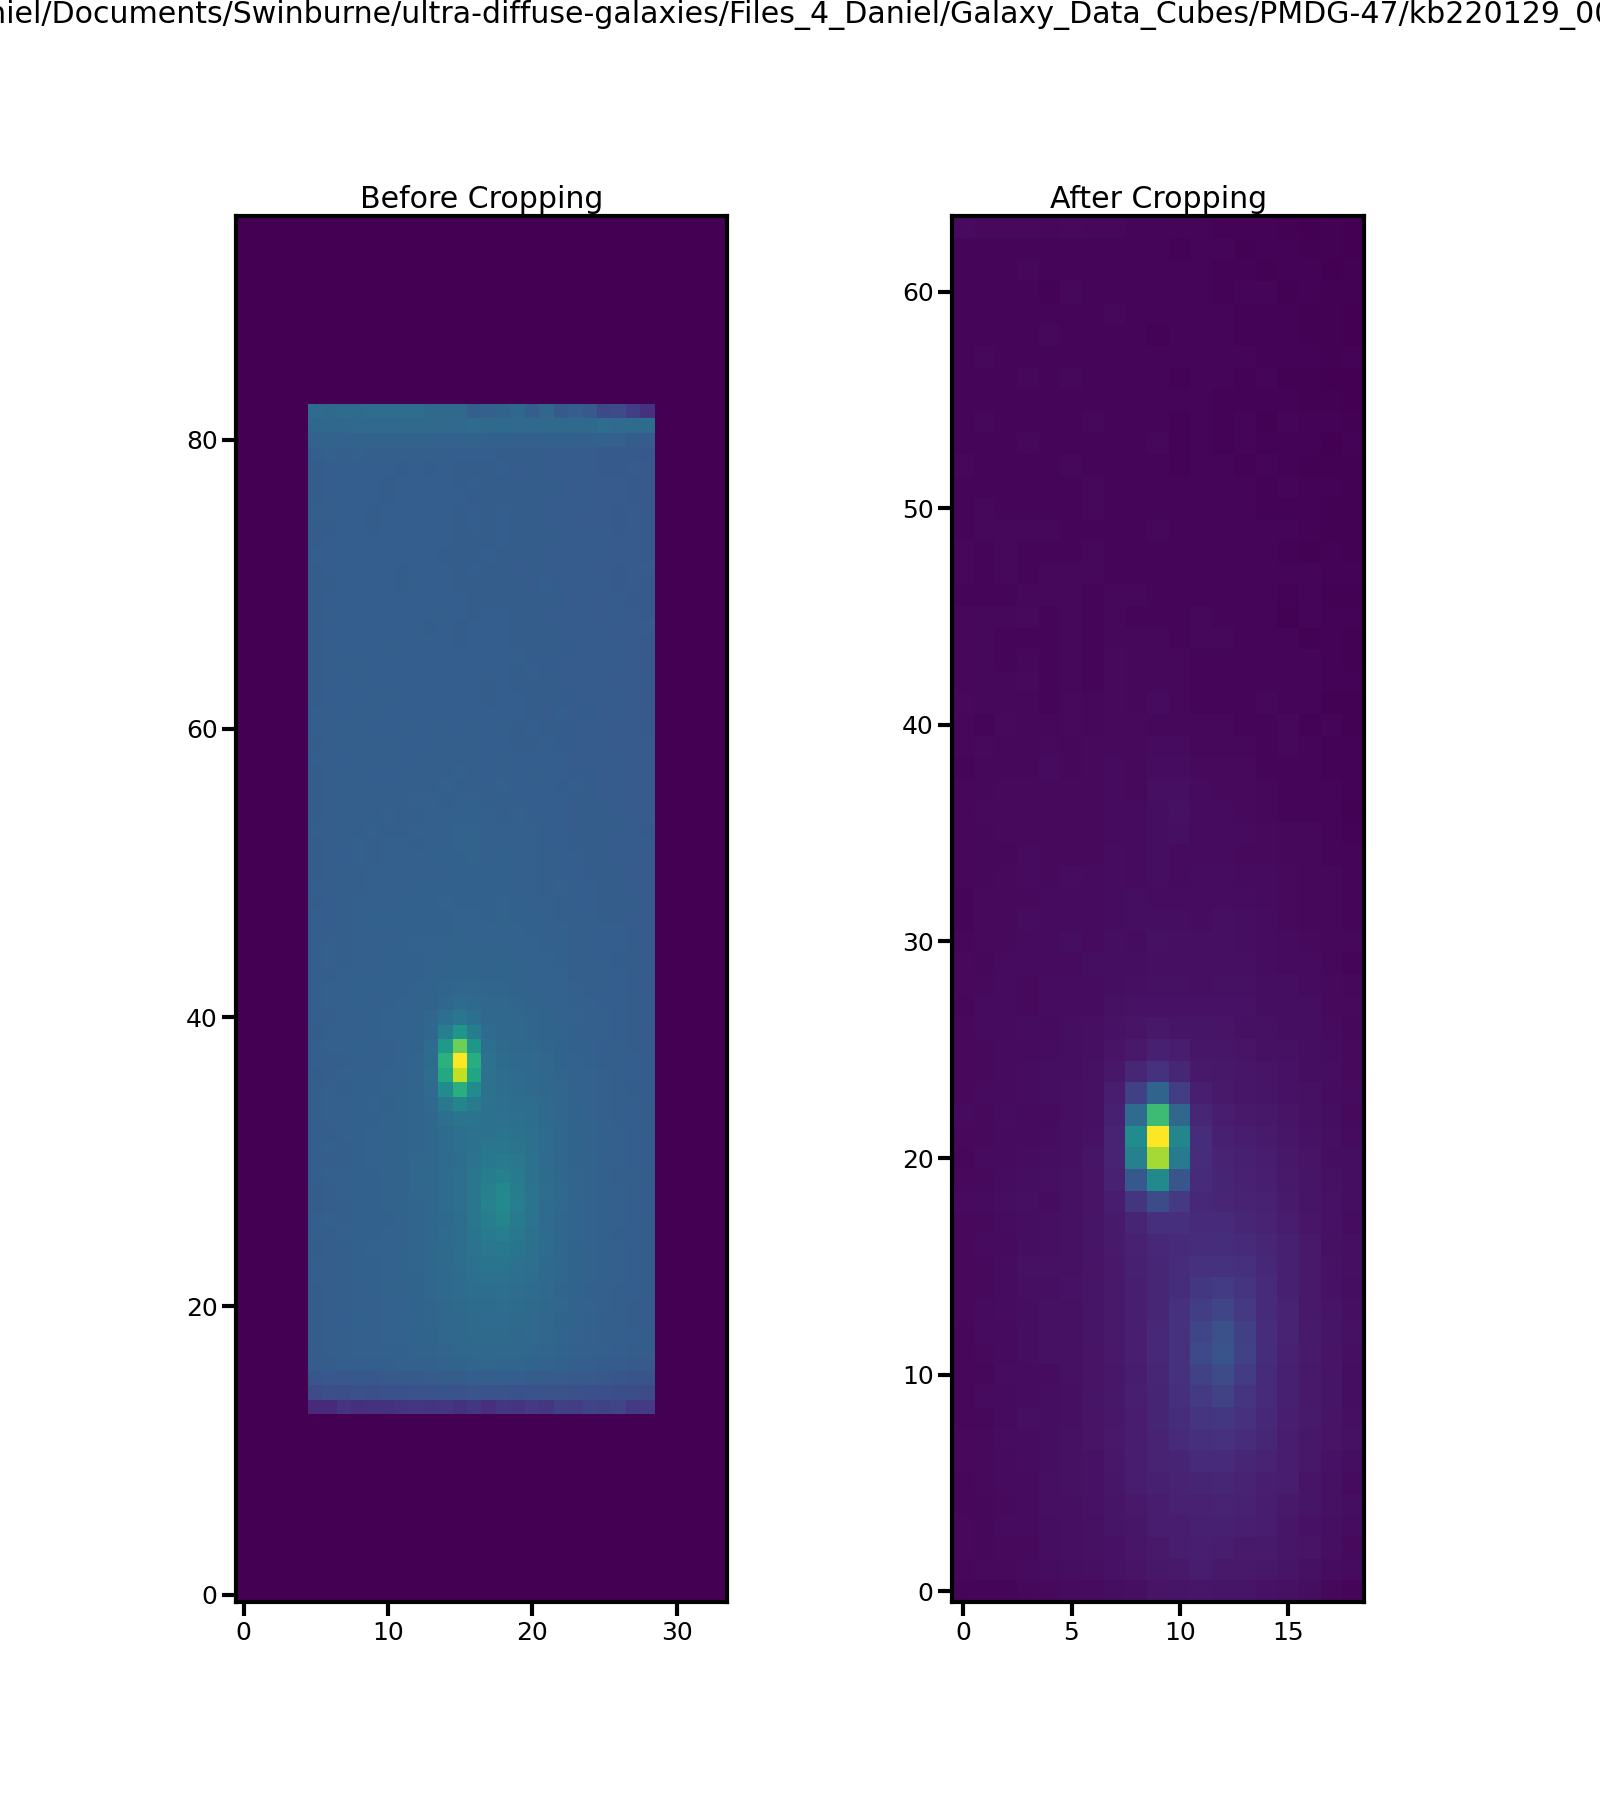

Files Written out
Code Competed Successfully in, 16.24 seconds


In [2]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Galaxy_Data_Cubes/PMDG-47/' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 25
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 80

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [15]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'auto' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Correction Deltas: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 15.925083155350219 km/s
The Barycentric correction is: 15.902780584585134 km/s
The Barycentric correction is: 15.720860801976345 km/s
The Barycentric correction is: 15.688096062121335 km/s
ensured bary_corr is negative
Barycentric correction: [-15.92508316 -15.90278058 -15.7208608  -15.68809606] km/s
Correction Deltas: [0.02230257 0.18191978 0.03276474] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/42.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/43.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/45.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/46.fits']
[3556. 3557. 3558. ... 5572. 5573. 5574.]


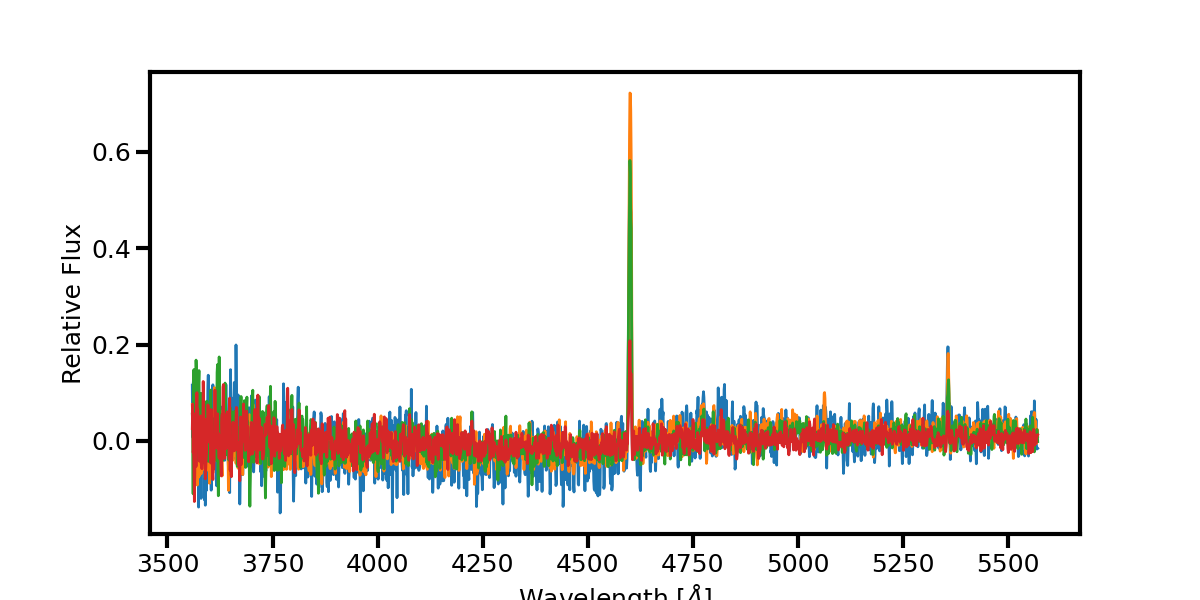

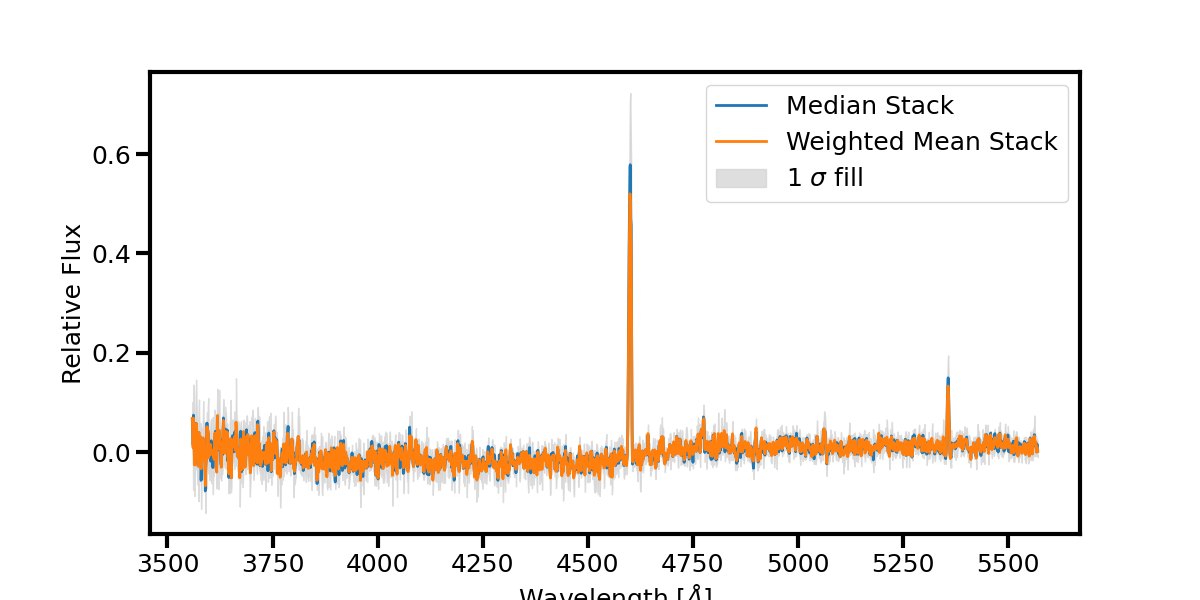

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/mean.fits' already exists.

In [16]:
""" User inputs """
s3_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/IKN_GCC7/obj1/' # path to directory containing spectra
s3_file_keyword = '[0-9]*.fits' # keyword to find files in directory
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close('all')
spectra_stack(s3_file_directory, s3_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack
plt.close()

### step 4.1: Check ppxf velocities of degrees

In [19]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj1/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 5000 / 1800 # instrument resolution
# min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials
wavcut = -1 # cut the spectra at this wavelength. -1 to not cut

# degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
# velocities = []
# for deg in tqdm(degrees):
#     vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
#     clear_output(wait=True)
#     velocities.append(vel)
# plt.close()

# plt.figure(figsize=(10, 5))
# plt.scatter(degrees, velocities)
# plt.xlabel("Polynomial Degree")
# plt.ylabel("Radial Velocity [km/s]")
# plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
# plt.show()

### step 4.2 ppxf with best degree

 Best Fit:       Vel     sigma
 comp.  0:       167       166
chi2/DOF: 181.2; DOF: 1828; degree = 6; mdegree = 6
method = capfit; Jac calls: 10; Func calls: 92; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/150
Formal errors:
     dV    dsigma   dh3      dh4
      11      15
Elapsed time in pPXF: 0.85 s
Best-fitting redshift z = 0.000558 +/- 0.000036
Signal-to-noise ratio per pixel: 34.09
1.1133778328254313 0.03265905131710983


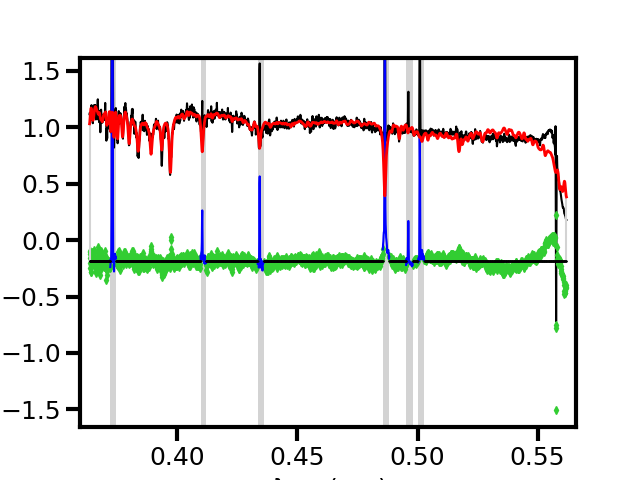

In [20]:
""" User inputs """
degree = 6 # degree of Legendre polynomial to use

plt.close()
ppxf_kinematics(ppxf_file, fwhm_gal, degree, wavcut)
plt.savefig(os.path.dirname(ppxf_file) + '/fit.png')